# ⚙📏 Model Evaluation & Data Preprocessing

# 1. Data preprocessing:

<p>Data preprocessing is a important step in the data science transforming raw data into a clean structured format for analysis. It involves tasks like handling missing values, normalizing data and encoding variables. Pre-processing refers to the transformations applied to data before feeding it to the algorithm.</p>

- Goal is to improve the quality of the data.
- Helps in handling missing values, removing duplicates, and normalizing data.
- Ensures the accuracy and consistency of the dataset.

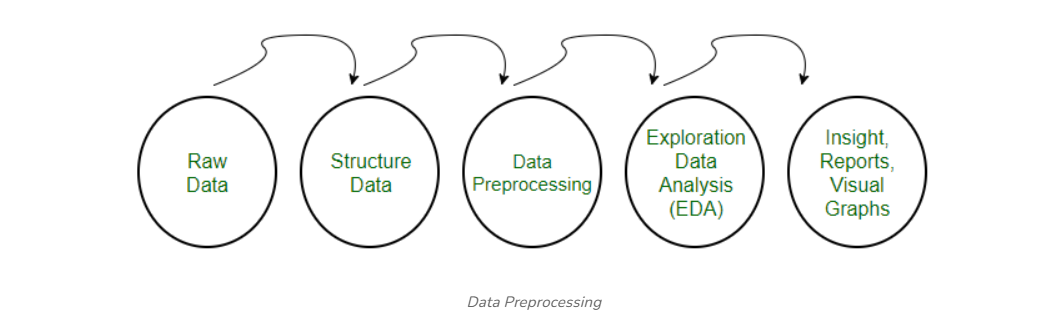


# **Scaling (StandardScaler, MinMaxScaler)**

<p>Scaling in machine learning refers to the process of transforming the range of independent variables or features within a dataset. This is done to bring all features to a similar scale, preventing features with larger numerical ranges from dominating the learning process of certain algorithms. Two common scaling methods are StandardScaler and MinMaxScaler.</p>

## **a. StandardScaler**

StandardScaler is a feature scaling technique which follows Standard Normal Distribution(SND) and is used to standardize the values of numeric features. It transforms data so that the mean becomes 0 and the standard deviation becomes 1. It’s ideal for algorithms like SVM, logistic regression or neural networks that assume data is normally distributed.

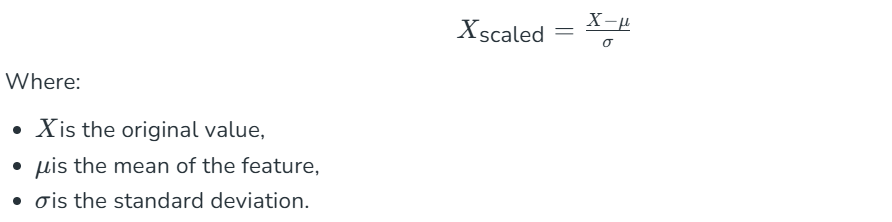

scaler = preprocessing.StandardScaler(): This creates an example of StandardScaler to scale data by removing mean and scaling to unit variance.
### When to Use:

- Algorithms assuming normally distributed data (e.g., SVM, Logistic Regression, Neural Networks).

### Advantages:

- Handles different units effectively.
- Reduces impact of outliers (but doesn’t remove them completely).

### Disadvantages:

- Sensitive to outliers extreme values can distort mean/standard deviation.
- Not suitable for non-normal distributions.

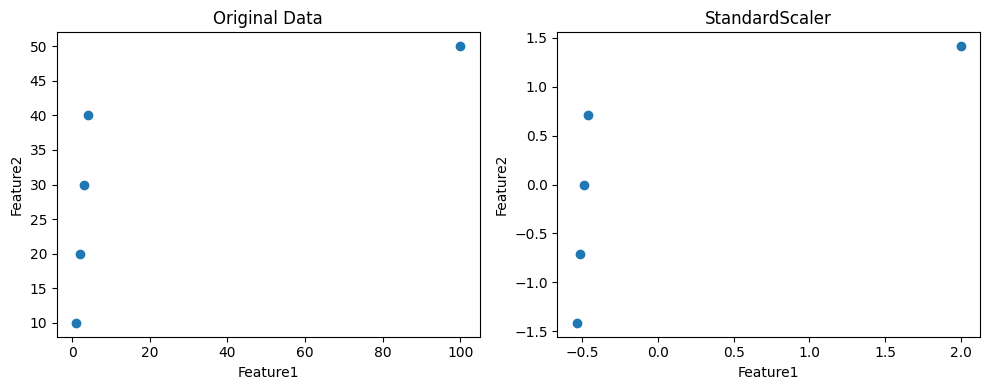

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sample data
data = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 100],  # Outlier in the last value
    'Feature2': [10, 20, 30, 40, 50]
})

# Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=['Feature1', 'Feature2'])

# Plot before and after scaling
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Before scaling
axes[0].scatter(data['Feature1'], data['Feature2'])
axes[0].set_title("Original Data")
axes[0].set_xlabel("Feature1")
axes[0].set_ylabel("Feature2")

# After scaling
axes[1].scatter(scaled_df['Feature1'], scaled_df['Feature2'])
axes[1].set_title("StandardScaler")
axes[1].set_xlabel("Feature1")
axes[1].set_ylabel("Feature2")

plt.tight_layout()
plt.show()


## **b. MinMaxScaler**

MinMaxScaler scales all data features to the range [0, 1], or to [-1, 1] if negative values are present in the dataset. Use it when the data does not follow a normal distribution, or when scaled data is needed for algorithms like Decision Trees, K-Nearest Neighbors, or Support Vector Machines. It gives the best results when outliers are minimal or absent, as it is sensitive to extreme values.

It scales data to a fixed range (typically [0, 1]) by subtracting the minimum value and dividing by the range (max − min), ensuring all feature values lie within the specified range.

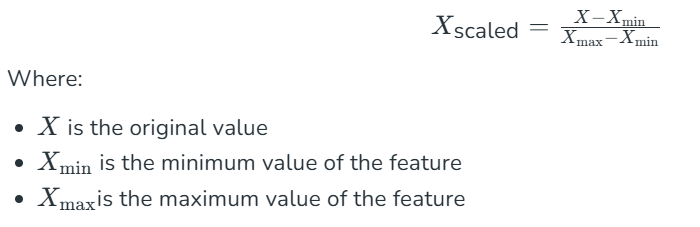

scaler = preprocessing.MinMaxScaler(): This creates an example of MinMaxScaler to scale data to a specified range [0, 1].
### When to Use:

- Data not normally distributed.
- Algorithms like Decision Trees, KNN, SVM.
- Data without significant outliers.

### Advantages:

- Ensures all features have the same scale.
- Simple and easy to interpret.

### Disadvantages:

- Highly sensitive to outliers extreme values can squash most data near 0 or 1.
- Fixed range may limit flexibility for changing datasets.



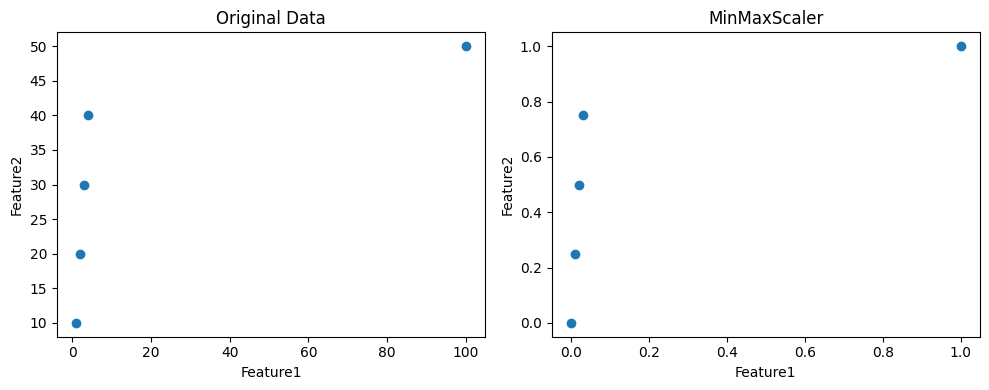

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Sample data
data = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 100],  # Outlier in the last value
    'Feature2': [10, 20, 30, 40, 50]
})

# Apply MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=['Feature1', 'Feature2'])

# Plot before and after scaling
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Before scaling
axes[0].scatter(data['Feature1'], data['Feature2'])
axes[0].set_title("Original Data")
axes[0].set_xlabel("Feature1")
axes[0].set_ylabel("Feature2")

# After scaling
axes[1].scatter(scaled_df['Feature1'], scaled_df['Feature2'])
axes[1].set_title("MinMaxScaler")
axes[1].set_xlabel("Feature1")
axes[1].set_ylabel("Feature2")

plt.tight_layout()
plt.show()


## Comparison Table

| Feature | StandardScaler | MinMaxScaler | RobustScaler |
| --- | --- | --- | --- |
| **Centers Data** | Yes (mean = 0) | No | Yes (median) |
| **Scale Range** | Unit variance | Fixed range ([0,1]) | IQR |
| **Outlier Impact** | High sensitivity | High sensitivity | Low sensitivity |
| **Best For** | Normal distribution algorithms | Non-normal, no outliers | Outlier-heavy datasets |

---

# 🔢 **One-hot encoding**


One Hot Encoding is a method for converting categorical variables into a binary format. (os and 1s).

- Each unique category becomes a new column.
- `1` indicates the presence of the category, and `0` indicates its absence.

📌 The primary purpose of One Hot Encoding is to ensure that categorical data can be  effectively used in machine learning models.

### **Why One-Hot Encoding is Important**

### 🎯 1. Eliminates Ordinality

- Many categorical variables have no inherent order (e.g., `"Male"`, `"Female"`).
- Assigning numbers like `"Male" = 0`, `"Female" = 1` may make the model think there’s a ranking.
- OHE prevents this by creating separate columns for each category.

### 2. Improves Model Performance

- Gives models a more detailed representation of categories.
- Allows capturing complex relationships in data that would be missed if categories were just numeric codes.

### 3. Ensures Algorithm Compatibility

- Many ML algorithms (Linear Regression, Logistic Regression, Neural Networks) require numerical inputs.
- OHE transforms non-numeric categories into machine readable form.

## 🛠 **How It Works – Example**

### **Original Data:**

| Fruit | Price |
| --- | --- |
| Apple | 100 |
| Mango | 80 |
| Orange | 90 |
| Apple | 110 |

### **After One-Hot Encoding:**

| Price | Apple | Mango | Orange |
| --- | --- | --- | --- |
| 100 | 1 | 0 | 0 |
| 80 | 0 | 1 | 0 |
| 90 | 0 | 0 | 1 |
| 110 | 1 | 0 | 0 |



## **Advantages**

✅ Works with ML models requiring numeric inputs.

✅ Avoids misleading ordinal relationships.

✅ Improves model accuracy by making category differences explicit.




### Implementing One-Hot Encoding Using Python


In [9]:
import pandas as pd

# Sample data
data = {
    'Employee id': [10, 20, 15, 25, 30],
    'Gender': ['M', 'F', 'F', 'M', 'F'],
    'Remarks': ['Good', 'Nice', 'Good', 'Great', 'Nice']
}

df = pd.DataFrame(data)
print(f"Original Employee Data:\n{df}\n")

# One-Hot Encoding using Pandas
df_pandas_encoded = pd.get_dummies(df, columns=['Gender', 'Remarks'], drop_first=True)
print(f"One-Hot Encoded Data using Pandas:\n{df_pandas_encoded}\n")


Original Employee Data:
   Employee id Gender Remarks
0           10      M    Good
1           20      F    Nice
2           15      F    Good
3           25      M   Great
4           30      F    Nice

One-Hot Encoded Data using Pandas:
   Employee id  Gender_M  Remarks_Great  Remarks_Nice
0           10      True          False         False
1           20     False          False          True
2           15     False          False         False
3           25      True           True         False
4           30     False          False          True



###  One-Hot Encoding using Scikit-Learn

In [10]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Sample data
data = {
    'Employee id': [10, 20, 15, 25, 30],
    'Gender': ['M', 'F', 'F', 'M', 'F'],
    'Remarks': ['Good', 'Nice', 'Good', 'Great', 'Nice']
}

df = pd.DataFrame(data)
print(f"Original Employee Data:\n{df}\n")

# Define categorical columns
categorical_columns = ['Gender', 'Remarks']

# One-Hot Encoding using Scikit-Learn
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

# Create new DataFrame with encoded features
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Combine with original numerical columns
df_sklearn_encoded = pd.concat([df.drop(categorical_columns, axis=1), one_hot_df], axis=1)
print(f"One-Hot Encoded Data using Scikit-Learn:\n{df_sklearn_encoded}\n")


Original Employee Data:
   Employee id Gender Remarks
0           10      M    Good
1           20      F    Nice
2           15      F    Good
3           25      M   Great
4           30      F    Nice

One-Hot Encoded Data using Scikit-Learn:
   Employee id  Gender_F  Gender_M  Remarks_Good  Remarks_Great  Remarks_Nice
0           10       0.0       1.0           1.0            0.0           0.0
1           20       1.0       0.0           0.0            0.0           1.0
2           15       1.0       0.0           1.0            0.0           0.0
3           25       0.0       1.0           0.0            1.0           0.0
4           30       1.0       0.0           0.0            0.0           1.0



## ⚠ **Disadvantages**

❌ **Increased dimensionality** → More columns for high-cardinality features.

❌ **Sparsity** → Many zero values in large datasets.

❌ **Overfitting risk** if dataset is small but categories are many.



## 💡 **Best Practices**

- **Limit categories**: Group rare categories into an "Other" class to reduce columns.
- **Feature selection**: Keep only important features post-OHE to reduce dimensionality.
- **Monitor performance**: Check if OHE causes overfitting or slows down training.
- **Understand the data**: If the feature has natural order (ordinal data), use Label Encoding instead.



## 🔄**Alternatives to OHE**

1. **Label Encoding** – Assigns integer values to categories (good for ordered categories).
2. **Binary Encoding** – Converts categories into binary numbers (reduces dimensionality).
3. **Target Encoding** – Replaces categories with target variable’s mean for that category (use carefully to avoid leakage).

# **Train/test split**

### **Train set:** 
The training dataset is a set of data that was utilized to fit the model. The dataset on which the model is trained. This data is seen and learned by the model.

### **Test set:**
The test dataset is a subset of the training dataset that is utilized to give an accurate evaluation of a final model fit.

### **validation set:**  
A validation dataset is a sample of data from your model's training set that is used to estimate model performance while tuning the model's hyperparameters.

🎯**Purpose**: To check how well the model generalizes to new, unseen data.

### ❗**Why It’s Important**

- Prevents overfitting (model memorizes training data).
- Provides a realistic performance estimate.
- Ensures robust evaluation before deployment.

### ⚙️**How It Works**

- Typically, the dataset is split in 70:30 or 80:20 ratio (train:test).
- Random shuffling is usually applied to ensure each subset is representative.

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Sample dataset
data = {
    'Feature1': [10, 20, 30, 40, 50, 60, 70, 80],
    'Feature2': [5, 10, 15, 20, 25, 30, 35, 40],
    'Target': [0, 0, 1, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

# Features and target
X = df[['Feature1', 'Feature2']]
y = df['Target']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train:\n", X_train)
print("X_test:\n", X_test)
print("y_train:\n", y_train)
print("y_test:\n", y_test)


X_train:
    Feature1  Feature2
0        10         5
7        80        40
2        30        15
4        50        25
3        40        20
6        70        35
X_test:
    Feature1  Feature2
1        20        10
5        60        30
y_train:
 0    0
7    1
2    1
4    0
3    1
6    0
Name: Target, dtype: int64
y_test:
 1    0
5    1
Name: Target, dtype: int64


### 📌Key Points

-> test_size: Fraction of data for testing (0.2 = 20%).

-> train_size: Fraction of data for training (optional).

-> random_state: Ensures reproducibility (same split every run).

-> Train/test split is often followed by scaling/encoding applied on training data only, then applied to test data.

# 2. **Evaluation matrices**

Evaluation metrics help us to measure the effectiveness of our models. Whether we are solving a classification problem, predicting continuous values or clustering data, selecting the right evaluation metric allows us to assess how well the model meets our goals. 

## **Regression: MAE, MSE, R²**

- Regression predicts continuous numerical values from input features.
- Common algorithms in scikit-learn:
    - Linear Regression
    - Decision Trees
    - Random Forests
    - Support Vector Machines (SVM)

### 🔍Key Concept:

- Compare True Values (actual) vs Predicted Values (model output) to evaluate performance.

## 📏**Importance of Regression Metrics**

- Quantitatively measure model performance.
- Prevent overfitting.
- Provide realistic assessment of model accuracy.
- Help in model comparison and selection.

In the regression task, we are supposed to predict the target variable which is in the form of continuous values. To evaluate the performance of such a model below metrics are used:

1. Mean Absolute Error(MAE)
2. Mean Squared Error(MSE)
3. Root Mean Squared Error(RMSE)



### 1. Mean Absolute Error(MAE)
MAE calculates the average of the absolute differences between the predicted and actual values. It gives a clear view of the model’s prediction accuracy but it doesn't shows whether the errors are due to over- or under-prediction. It is simple to calculate and interpret helps in making it a good starting point for model evaluation.

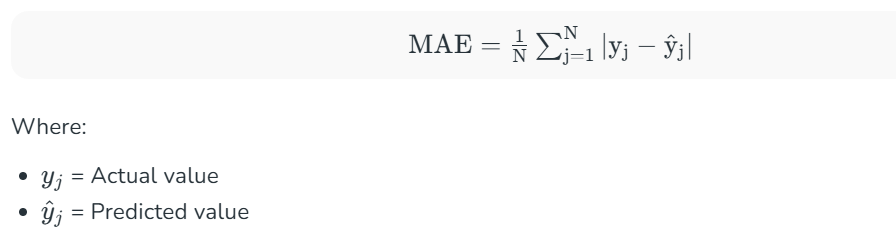

In [16]:
from sklearn.metrics import mean_absolute_error

true_values = [2.5, 3.7, 1.8, 4.0, 5.2]
predicted_values = [2.1, 3.9, 1.7, 3.8, 5.0]

mae = mean_absolute_error(true_values, predicted_values)
print("MAE:", mae)


MAE: 0.22000000000000003


### 2. Mean Squared Error(MSE)

MSE calculates the average of the squared differences between the predicted and actual values. Squaring the differences ensures that larger errors are penalized more heavily helps in making it sensitive to outliers. This is useful when large errors are undesirable but it can be problematic when outliers are not relevant to the model’s purpose.

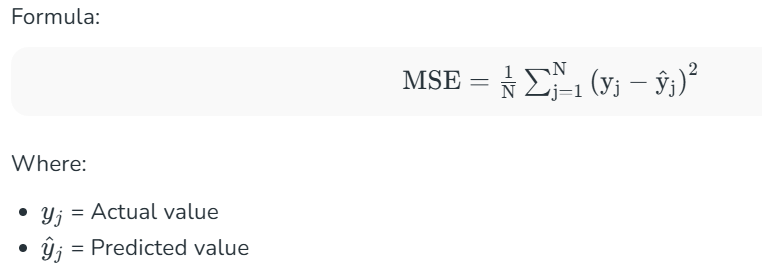

In [17]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(true_values, predicted_values)
print("MSE:", mse)


MSE: 0.057999999999999996


### 3. Root Mean Squared Error(RMSE)

RMSE is the square root of MSE, bringing the metric back to the original scale of the data. Like MSE, it heavily penalizes larger errors but is easier to interpret as it’s in the same units as the target variable. It’s useful when we want to know how much our predictions deviate from the actual values in terms of the same scale.

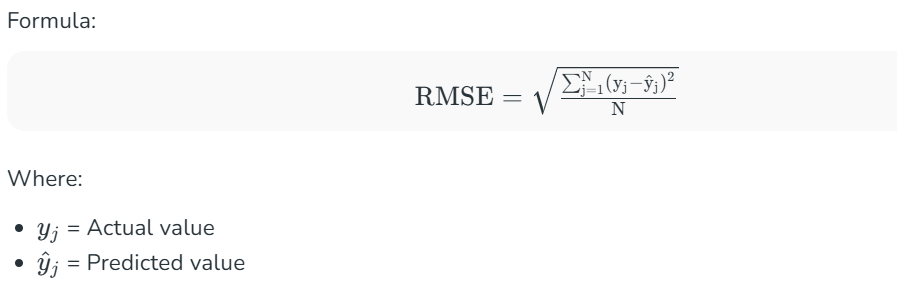


In [18]:
import numpy as np

rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
print("RMSE:", rmse)


RMSE: 0.2408318915758459


## **Classification: Accuracy, Precision, Recall, F1-score, ROC-AUC**

Classification teaches a machine to sort things into categories. It learns by looking at examples with labels (like emails marked "spam" or "not spam"). After learning, it can decide which category new items belong to, like identifying if a new email is spam or not. For example a classification model might be trained on dataset of images labeled as either dogs or cats and it can be used to predict the class of new and unseen images as dogs or cats based on their features such as color, texture and shape.

In classification tasks several metrics are used to evaluate model performance. Accuracy, precision, recall, F1-score, and ROC-AUC are common measures used to assess how well a model distinguishes between different classes. 

**i. Accuracy**

**ii. Precision**

**iii. Recall**

**iv. F1-score**

**v. ROC-AUC**

## **i. Accuracy (Overall Correctness)**

### **Definition:**

Accuracy measures the proportion of all predictions (both positive and negative) that were correct.

### **Formula:**

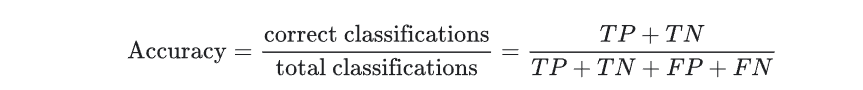

### **Where:**

- TP = True Positives ✅
- TN = True Negatives ✅
- FP = False Positives ❌
- FN = False Negatives ❌

### **Intuition:**

- Think of accuracy as “how often is the model right?”
- Example: In a spam email classifier, accuracy is the fraction of emails correctly labeled as spam or not spam.

### **Pros:**

- Easy to understand and compute.
- Works fine for balanced datasets.

### **Cons:**

- Misleading for **imbalanced datasets**.
    - Example: If 99% of emails are not spam, a dumb model predicting "not spam" for all emails gives 99% accuracy but is useless.

### **Use When:**

- Dataset is roughly balanced.
- You want a coarse-grained measure of performance.

---

## ii. Precision (Positive Predictive Value) 🎯

### **Definition:**

Precision measures the proportion of **predicted positives** that are actually positive.

### **Formula:**

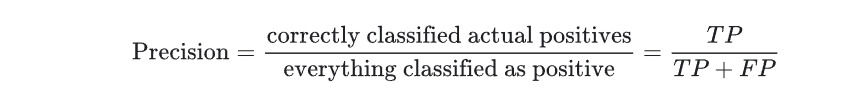

### **Intuition:**

- “Of all the times the model said positive, how many were actually correct?”
- Example: In spam detection, precision is the fraction of emails labeled as spam that are actually spam.

### **Pros:**

- Reduces **false alarms**.
- Useful when **positive predictions need to be very accurate**.

### **Cons:**

- Doesn’t account for missed positives (false negatives).
- Often **inversely related to recall**: improving one can hurt the other.

### **Use When:**

- You need **high confidence** in positive predictions.
    - Example: Recommending a product, sending a critical alert.

---

## iii. Recall (True Positive Rate / Sensitivity / Probability of Detection) 🔍



### **Definition:**

Recall measures the proportion of **actual positives** that the model correctly identifies.

### **Formula:**

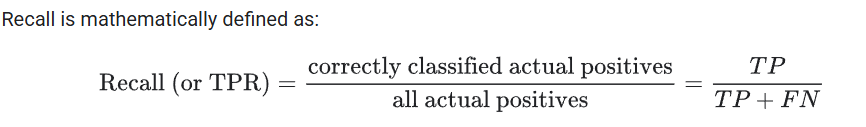

### **Intuition:**

- “Of all the actual positives, how many did we catch?”
- Example: In spam detection, recall is the fraction of spam emails that were correctly labeled as spam.

### **Pros:**

- Crucial for **imbalanced datasets** where missing positives is costly.
- Useful for medical diagnosis, fraud detection, spam detection.

### **Cons:**

- Doesn’t consider false positives. A model can have high recall but many false alarms.

### **Use When:**

- False negatives are **more costly** than false positives.
    - Example: Missing a cancer diagnosis (FN) is worse than a false alarm (FP).

---

## iv. **F1-score(Balance between Precision & Recall) ⚖️**

### **Definition:**

F1-score is the harmonic mean of precision and recall. It gives a single number that balances both metrics.

### **Formula:**

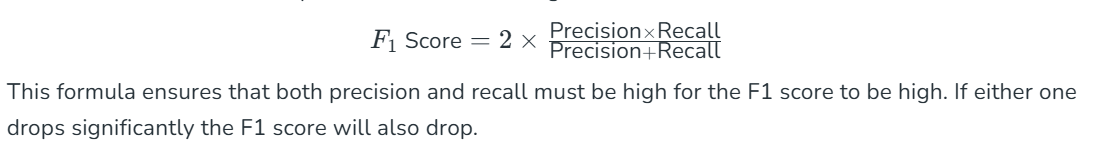

### **Intuition:**

- F1-score is high only when both precision and recall are high.
- Think of it as “a balance between catching positives (recall) and being correct when predicting positives (precision).”
- Perfect score = 1.0 (100%), worst score = 0.

### **Pros:**

- Very useful for imbalanced datasets.
- Combines precision and recall into a single metric.
- Avoids misleading high precision or high recall alone.

### **Cons:**

- Doesn’t consider true negatives (TN).
- Not as intuitive as accuracy.

### **Use When:**

- Dataset is imbalanced.
- You need a balance between precision and recall.
- Example: Spam detection — you want to catch most spam (high recall) but also avoid marking legit emails as spam (high precision).

### **💡 Key Insight:**

- F1-score = best metric when false positives and false negatives both matter.
- If you want more weight on recall (catching positives), use F2-score.
- If you want more weight on precision (being correct), use F0.5-score.

---

## v. ROC-AUC(Receiver Operating Characteristic – Area Under Curve) 📈

### **Definition:**

- **ROC curve** plots the **True Positive Rate (Recall)** against the **False Positive Rate (FPR)** at different classification thresholds.
- **AUC** (Area Under the Curve) measures the overall ability of the model to distinguish between classes.

It helps us to understand how well the model separates the positive cases like people with a disease from the negative cases like people without the disease at different threshold level. It shows how good the model is at telling the difference between the two classes by plotting:

- **True Positive Rate (TPR):** how often the model correctly predicts the positive cases also known as Sensitivity or Recall.
- **False Positive Rate (FPR):** how often the model incorrectly predicts a negative case as positive.
- **Specificity:** measures the proportion of actual negatives that the model correctly identifies. It is calculated as 1 - FPR.

The higher the curve the better the model is at making correct predictions.

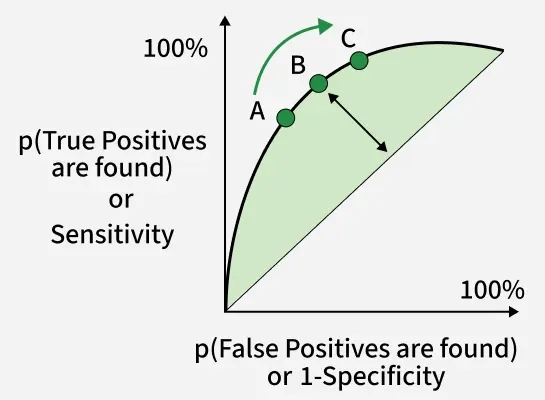

These terms are derived from the confusion matrix which provides the following values:

- **True Positive (TP)**: Correctly predicted positive instances
- **True Negative (TN)**: Correctly predicted negative instances
- **False Positive (FP)**: Incorrectly predicted as positive
- **False Negative (FN)**: Incorrectly predicted as negative

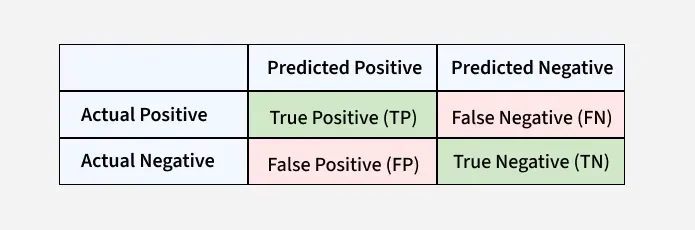

### **Intuition / How it Works:**

1. Randomly pick a positive data point (Class 1) and a negative data point (Class 0).
2. Check if the positive point has a higher predicted probability than the negative one.
3. Repeat for all possible positive-negative pairs.
4. AUC = proportion of pairs correctly ranked by the model.
- High AUC (≈1) → model effectively separates positives and negatives ✅
- Low AUC (≈0) → model fails to distinguish classes ❌
- AUC ≈ 0.5 → model is no better than random guessing ⚪

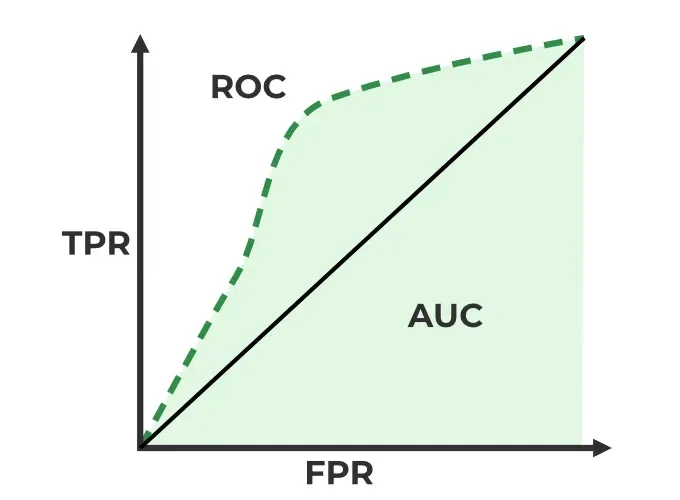

### **Pros:**

- Threshold-independent → evaluates model performance at all thresholds
- Good for comparing models on balanced datasets

### **Cons:**

- Can be overly optimistic on highly imbalanced datasets
- Does not give actual predicted class labels

### **Use When:**

- Dataset is balanced
- False positives and false negatives are of similar importance
- Comparing multiple classification models

### **Alternative for Imbalanced Datasets:**

- Use Precision-Recall Curve instead → focuses more on positive class detection



### **💡 Key Insight:**

- AUC gives a single summary measure of model’s ranking ability.
- Higher AUC → model is better at sorting positives vs negatives without worrying about classification thresholds.

---

In [2]:
# code for all the classification metrices
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Example actual and predicted labels
y_actual = [0, 1, 1, 0, 1, 0, 1, 0]
y_pred = [0, 1, 0, 0, 1, 0, 1, 1]  # predicted classes
y_prob = [0.1, 0.9, 0.4, 0.2, 0.8, 0.3, 0.7, 0.6]  # predicted probabilities for positive class

# Accuracy
accuracy = accuracy_score(y_actual, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_actual, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_actual, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_actual, y_pred)
print("F1 Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(y_actual, y_prob)
print("ROC-AUC:", roc_auc)

Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1 Score: 0.75
ROC-AUC: 0.9375


# 4. Cross-validation (k-fold)

Cross-validation is a technique used to check how well a machine learning model performs on unseen data. It splits the data into several parts, trains the model on some parts and tests it on the remaining part repeating this process multiple times. Finally the results from each validation step are averaged to produce a more accurate estimate of the model's performance.

The main purpose of cross validation is to prevent overfitting. If you want to make sure your machine learning model is not just memorizing the training data but is capable of adapting to real-world data cross-validation is a commonly used technique.

### 💡**Intuition**

- Instead of trusting a single train-test split, k-fold cross-validation tests the model on multiple different subsets.
- This ensures the model is generalizing well and not just memorizing one specific subset.
- Example:
    - Dataset = 100 samples, k = 5
    - Split into 5 folds of 20 samples each
    - Iteration 1: Train on 80, Test on 20
    - Iteration 2: Train on another 80, Test on the next 20
    - … repeat 5 times → Average accuracy

### 🧩Types of Cross-Validation

There are several types of cross validation techniques which are as follows:

### 1.  **Holdout Validation**
    
In Holdout validation we perform training on the 50% of the given dataset and rest 50% is used for the testing purpose. It's a simple and quick way to evaluate a model. The major drawback of this method is that we perform training on the 50% of the dataset, it may possible that the remaining 50% of the data contains some important information which we are leaving while training our model that can lead to higher bias.
    
#### 2. **LOOCV (Leave One Out Cross Validation)**
    
In this method we perform training on the whole dataset but leaves only one data-point of the available dataset and then iterates for each data-point. In LOOCV the model is trained on n−1n−1 samples and tested on the one omitted sample repeating this process for each data point in the dataset. It has some advantages as well as disadvantages also.
    
- An advantage of using this method is that we make use of all data points and hence it is low bias.
- The major drawback of this method is that it leads to higher variation in the testing model as we are testing against one data point. If the data point is an outlier it can lead to higher variation.
- Another drawback is it takes a lot of execution time as it iterates over the number of data points we have.
  
#### 3. **Stratified Cross-Validation**
    
It is a technique used in machine learning to ensure that each fold of the cross-validation process maintains the same class distribution as the entire dataset. This is particularly important when dealing with imbalanced datasets where certain classes may be under represented. In this method:
    
- The dataset is divided into k folds while maintaining the proportion of classes in each fold.
- During each iteration, one-fold is used for testing and the remaining folds are used for training.
- The process is repeated k times with each fold serving as the test set exactly once.
    
Stratified Cross-Validation is essential when dealing with classification problems where maintaining the balance of class distribution is crucial for the model to generalize well to unseen data.
    
#### 4.  **K-Fold Cross Validation**
    
In K-Fold Cross Validation we split the dataset into k number of subsets known as folds then we perform training on the all the subsets but leave one (k-1) subset for the evaluation of the trained model. In this method, we iterate k times with a different subset reserved for testing purpose each time.
    
> Note: It is always suggested that the value of k should be 10 as the lower value of k takes towards validation and higher value of k leads to LOOCV method.
> 
    

### 🛠️**Use Cases**

- **Model evaluation and selection**
    - Compare multiple algorithms fairly
- **Hyperparameter tuning**
    - Helps select best parameters without overfitting
- **Small datasets**
    - Maximizes training data use while still testing model
- **Imbalanced datasets** (with stratified CV)
    - Ensures fair representation of minority class

### **Advantages ✅**

1. **Overcoming Overfitting**
    - Cross-validation provides a more robust estimate of model performance on unseen data.
    - Helps prevent the model from memorizing the training set.
2. **Model Selection**
    - Used to compare different models.
    - Selects the model that performs the best on average across folds.
3. **Hyperparameter Tuning**
    - Optimizes hyperparameters (e.g., regularization, tree depth).
    - Finds the values that give the best validation performance.
4. **Data Efficient**
    - Uses all available data for both training and validation.
    - More efficient than a simple train-test split, especially for small datasets.



### **Disadvantages ❌**

1. **Computationally Expensive**
    - Training the model k times increases computation.
    - Becomes heavy for large datasets or complex models.
2. **Time-Consuming**
    - Can take a long time when tuning multiple hyperparameters or comparing many models.
3. **Bias-Variance Tradeoff**
    - Choice of **k affects bias and variance**:
        - **Too few folds** → higher bias, less reliable estimate
        - **Too many folds** → higher variance, more computation



### **💡 Key Insight:**

- Cross-validation improves model reliability but at the cost of time and computation.
- Common choice: k = 5 or 10 for a good balance between bias, variance, and computational cost.

| **Feature** | **K-Fold Cross-Validation** | **Hold-Out Method** |
| --- | --- | --- |
| **Definition** | The dataset is divided into 'k' subsets (folds). Each fold gets a turn to be the test set while the others are used for training. | The dataset is split into two sets: one for training and one for testing. |
| **Training Sets** | The model is trained 'k' times, each time on a different training subset. | The model is trained once on the training set. |
| **Testing Sets** | The model is tested 'k' times, each time on a different test subset. | The model is tested once on the test set. |
| **Bias** | Less biased due to multiple splits and testing. | Can have higher bias due to a single split. |
| **Variance** | Lower variance, as it tests on multiple splits. | Higher variance, as results depend on the single split. |
| **Computation Cost** | High, as the model is trained and tested 'k' times. | Low, as the model is trained and tested only once. |
| **Use in Model Selection** | Better for tuning and evaluating model performance due to reduced bias. | Less reliable for model selection, as it might give inconsistent results. |
| **Data Utilization** | The entire dataset is used for both training and testing. | Only a portion of the data is used for testing, so some data is not used for validation. |
| **Suitability for Small Datasets** | Preferred for small datasets, as it maximizes data usage. | Less ideal for small datasets, as a significant portion is held out for testing. |
| **Risk of Overfitting** | Less prone to overfitting due to multiple training and testing cycles. | Higher risk of overfitting as the model is trained on one set. |

---

In [47]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load a sample dataset
data = load_iris()
X, y = data.data, data.target

# Define the number of folds (k)
k = 5

# Initialize KFold cross-validator
# n_splits: number of folds
# shuffle: whether to shuffle the data before splitting
# random_state: for reproducibility when shuffle=True
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize a machine learning model (e.g., RandomForestClassifier)
model = RandomForestClassifier(random_state=42)

# Perform K-Fold cross-validation
# cv: specifies the cross-validation strategy (our kf object)
# scoring: metric to evaluate the model (e.g., 'accuracy')
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the accuracy for each fold
print(f"Accuracy for each fold: {scores}")

# Calculate and print the average accuracy across all folds
average_accuracy = np.mean(scores)
print(f"Average Accuracy: {average_accuracy:.2f}")

Accuracy for each fold: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Average Accuracy: 0.96


# 5. Hands-on

 

### Practice on a dataset (sklearn.datasets.load_breast_cancer)


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


Explanation:

- numpy & pandas → data handling

- matplotlib → plotting (ROC curve)

- sklearn.datasets → load sample datasets

- sklearn.model_selection → splitting data & cross-validation

- sklearn.preprocessing → scaling & encoding

- RandomForestClassifier → our ML model

- sklearn.metrics → evaluation metrics

In [55]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset shape:", X.shape)
print("Target classes:", np.unique(y))


Dataset shape: (569, 30)
Target classes: [0 1]


Explanation:

- X → features (30 numeric features in this dataset)

- y → target labels (0=malignant, 1=benign)

- Checking shape and classes ensures our data looks right.

In [56]:
# StandardScaler
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X)

# MinMaxScaler
scaler_mm = MinMaxScaler()
X_mm = scaler_mm.fit_transform(X)


Why:

- StandardScaler → mean=0, std=1

- MinMaxScaler → scales to [0,1]

- Scaling is important for models sensitive to feature ranges (not critical for Random Forest, but good practice).

In [57]:
# Add a dummy categorical column
X['diagnosis_type'] = np.random.choice(['A', 'B'], size=X.shape[0])

# Encode it
encoder = OneHotEncoder(sparse_output=False)
encoded_cat = encoder.fit_transform(X[['diagnosis_type']])
encoded_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(['diagnosis_type']))

# Combine
X_final = pd.concat([X.drop('diagnosis_type', axis=1), encoded_df], axis=1)


Why:

- Converts categorical data into numeric so ML models can handle it.

- Each category becomes a new column with 0/1.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.3, random_state=42, stratify=y
)


Why:

- 70% training, 30% testing

- stratify=y → keeps class distribution consistent

- random_state=42 → reproducibility

In [60]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Why:

- Random Forest → ensemble of decision trees, robust and handles non-linear data

- fit() → trains model

In [62]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # probability of class 1
TP = np.sum((y_test == 1) & (y_pred == 1))
TN = np.sum((y_test == 0) & (y_pred == 0))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))

conf_matrix = np.array([[TN, FP],
                        [FN, TP]])

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 58   6]
 [  3 104]]


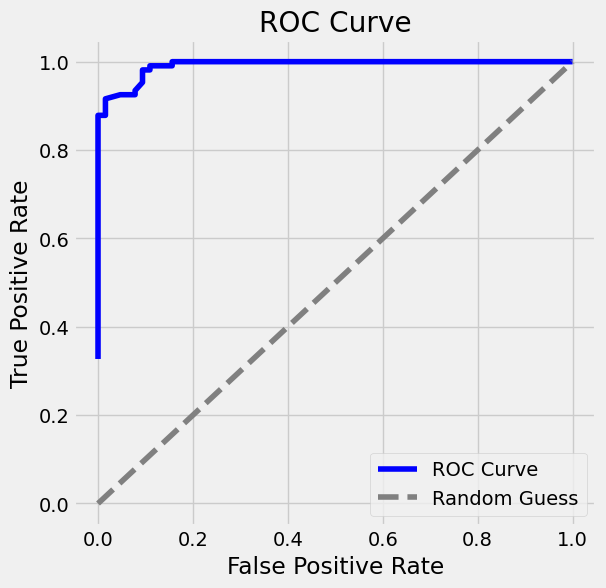

In [63]:
thresholds = np.linspace(0, 1, 100)
tpr_list = []
fpr_list = []

for t in thresholds:
    y_thresh = (y_prob >= t).astype(int)
    TP = np.sum((y_test == 1) & (y_thresh == 1))
    TN = np.sum((y_test == 0) & (y_thresh == 0))
    FP = np.sum((y_test == 0) & (y_thresh == 1))
    FN = np.sum((y_test == 1) & (y_thresh == 0))
    
    TPR = TP / (TP + FN)  # Sensitivity
    FPR = FP / (FP + TN)  # 1 - Specificity
    
    tpr_list.append(TPR)
    fpr_list.append(FPR)

plt.figure(figsize=(6,6))
plt.plot(fpr_list, tpr_list, label='ROC Curve', color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Why:

- Plots how TPR vs FPR changes with thresholds

- Area under curve = model’s ability to discriminate classes

In [64]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)


Accuracy: 0.9473684210526315
Precision: 0.9454545454545454
Recall: 0.9719626168224299
F1-score: 0.9585253456221198
ROC-AUC: 0.9916764018691588


Why:

- Accuracy → overall correctness

- Precision → correctness of positive predictions

- Recall → coverage of positive class

- F1 → balance of precision & recall

- ROC-AUC → class separation ability

In [65]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_final, y, cv=kf, scoring='accuracy')

print("5-Fold CV Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


5-Fold CV Accuracy Scores: [0.96491228 0.96491228 0.94736842 0.95614035 0.95575221]
Mean CV Accuracy: 0.9578171091445429


Why:

- Tests model stability

- Model trained/tested on multiple splits → more reliable performance estimate